In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import os
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
X = pd.read_csv('X_model.csv')
y = pd.read_csv('Y_model.csv')
X.head()
# gender, age_code, region_code, data by date

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220817,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826
0,1,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,5,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
train_df = pd.concat([X,y], axis=1)
train_df

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826,business
0,1,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
1,1,5,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1,6,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
799996,2,11,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
799997,1,4,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0
799998,1,7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Pivot table

In [6]:
train_df[['gender', 'business']].groupby(['gender'], as_index=False).mean().sort_values(by='business', ascending=False) 
# 설명에는 0 or 1 인데 1 or 2로 돼 있음
# 성별에 따른 CEO 비율은 유의미한 차이를 보인다.     7.00% vs 6.10%         1성별이 2성별보다 15%정도 높은 비율을 지닌다.

,gender,business
0,1,0.069879
1,2,0.060927


In [7]:
train_df[['age_code', 'business']].groupby(['age_code'], as_index=False).mean().sort_values(by='age_code', ascending=False)
# 10대 CEO는 없고, 20대부터 점차 증가해 60~70대에 CEO가 가장 많다. 이후에는 다시 감소하는 추세를 보인다.

,age_code,business
13,14,0.043351
12,13,0.063545
11,12,0.085589
10,11,0.108003
9,10,0.116801
8,9,0.113562
7,8,0.104447
6,7,0.091704
5,6,0.076324
4,5,0.051589


In [8]:
train_df[['region_code', 'business']].groupby(['region_code'], as_index=False).mean().sort_values(by='region_code', ascending=False)
# 1~18까지의 region_code가 있다고 했으나, 3 대신에 0이 존재한다.

,region_code,business
17,18,0.071173
16,17,0.066774
15,16,0.053508
14,15,0.052099
13,14,0.055217
12,13,0.047752
11,12,0.050523
10,11,0.070743
9,10,0.052568
8,9,0.051421


In [9]:
print(train_df.loc[train_df['region_code']==0].loc[train_df['business']==1]) # 지역 0에 사는 고객 중 CEO는 없음

Empty DataFrame
Columns: [gender, age_code, region_code, business]
Index: []


### Visualizing

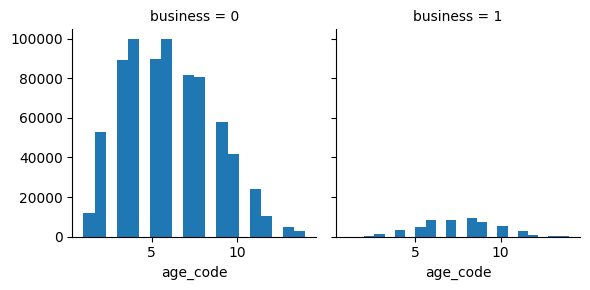

In [10]:
g = sns.FacetGrid(train_df, col='business')
g.map(plt.hist, 'age_code', bins=20)

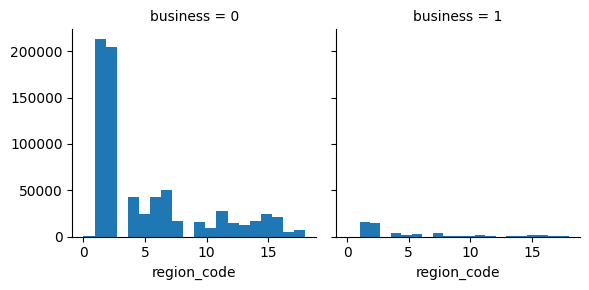

In [11]:
g = sns.FacetGrid(train_df, col='business')
g.map(plt.hist, 'region_code', bins=20)         # 1,2에 20만 가까운 유저, 가장 많은 사업가. 서울/경기? 나머지 광역시들도 대충 파악됨

### Time Series

In [33]:
cdf = train_df.iloc[:,3:241]
sdf = train_df.iloc[:,242:480]
tdf = train_df.iloc[:,479:718]
sdf

,s20220102,s20220103,s20220104,s20220105,s20220106,s20220107,s20220108,s20220109,s20220110,s20220111,...,s20220818,s20220819,s20220820,s20220821,s20220822,s20220823,s20220824,s20220825,s20220826,t20220101
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN
1,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.0,NaN,NaN,57.0,NaN,NaN,41.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN
799996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,146.0,NaN,NaN,48.0,NaN,NaN,6.0,NaN
799998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3017.0,NaN,NaN,NaN,NaN


In [28]:
cdf.isnull().sum()

c20220101    704750
c20220102    708219
c20220103    653326
c20220104    668417
c20220105    655145
              ...  
c20220822    640023
c20220823    654705
c20220824    654633
c20220825    609484
c20220826    640678
Length: 238, dtype: int64